# Quantum Key Distribution + "Quantum Computer Virus"

We learn about Quantum Key Distribution <a href="https://qiskit.org/textbook/ch-algorithms/quantum-key-distribution.html">here</a> and in brief, we have Alice and Bob trying to communicate a secret key over a channel/third party, Eve, and Quantum Key Distribution can show that the key are different if Eve is trying to eavesdrop (my bad english, "eavesdrop" doesn't exist but you get the meaning) the conversation. 

However suppose that Eve doesn't exist, and Alice and Bob communicates via Wabinab's channel. And this guy Wabinab are so bored of studying quantum computing (pleading for forgiveness here for whoever reading this) that he decides to create some random "Quantum Computer Virus" and inject this "phase virus" into the communication channel. More technically explained, he create some random numbers and use these random numbers to create random phase gates and when the package reaches his channel, he tries to "interfere" with the original message being communicated in between Alice and Bob. 

Let's see what would happen. 

In [1]:
import qiskit.tools.jupyter
%qiskit_version_table

In [9]:
%config Completer.use_jedi = False

from qiskit import *
from qiskit.visualization import *

from helper.helper import random_number_generator
from helper.QKD_helper import *

import numpy as np
from numpy.random import randint

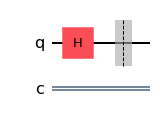

In [74]:
# Number of bits
n = 400

alice_bits = randint(2, size=n)
alice_bases = randint(2, size=n)

message = encode_message(alice_bits, alice_bases)

message[0].draw("mpl", style="iqx")

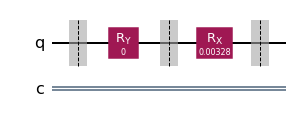

In [80]:
# ===========================================
# Virus injection channel
phase_random = random_number_generator(9)


def inject_virus(message, bases, phase_random=phase_random):
    messages = []
    gate_number = 1
    
    for q in range(n):
        
        try: 
            theta = np.pi * int(phase_random[gate_number- 1], 2) / int(phase_random[gate_number])
        except IndexError: 
            gate_number = 1
            
            try: 
                theta = np.pi * int(phase_random[gate_number - 1], 2) / int(phase_random[gate_number])

        if bases[q] == 1:  # Rx rotation
            message[q].rx(theta, 0)
            
        elif bases[q] == 2:  # Ry rotation
            message[q].ry(theta, 0)
            
        elif bases[q] == 3:  # Rz rotation
            message[q].rz(theta, 0)
            
        message[q].barrier()
        
        messages.append(message[q])

        gate_number += 1
        
    return messages



wabinab_bases = randint(4, size=n)
message = inject_virus(message, wabinab_bases)

message[0].draw("mpl", style="iqx")


# ===========================================

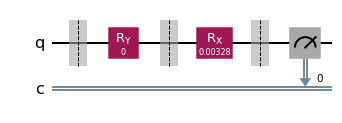

In [81]:
bob_bases = randint(2, size=n)

bob_results = measure_message(message, bob_bases)
message[0].draw("mpl", style="iqx")

In [82]:
alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

In [83]:
sample_size = 80
bit_selection = randint(n, size=sample_size)

bob_sample = sample_bits(bob_key, bit_selection)
alice_sample = sample_bits(alice_key, bit_selection)

print("Not modified: ", bob_sample == alice_sample)
print(f"Key length = {len(alice_key)}")

Not modified:  False
Key length = 118


Thing with this is we have really small modifications. What if we try larger modifications like $\frac{3\pi}{2}$ ? Then with this large rotation phase we could totally change the qubit representation from say, $0$ to $1$. 

In [99]:
n = 100
out = False

while out == False:
    alice_bits = randint(2, size=n)
    alice_bases = randint(2, size=n)

    message = encode_message(alice_bits, alice_bases)

    # =============================================
    gen_num = 3
    phase_random = random_number_generator(gen_num)

    # To escape zero division error: 
    phase_random.remove("0" * gen_num)

    wabinab_bases = randint(4, size=n)
    message = inject_virus(message, wabinab_bases, phase_random)

    # =============================================

    bob_bases = randint(2, size=n)

    bob_results = measure_message(message, bob_bases)

    alice_key = remove_garbage(alice_bases, bob_bases, alice_bits)

    bob_key = remove_garbage(alice_bases, bob_bases, bob_results)

    sample_size = 20
    bit_selection = randint(n, size=sample_size)

    bob_sample = sample_bits(bob_key, bit_selection)
    alice_sample = sample_bits(alice_key, bit_selection)

    print("Not modified: ", bob_sample == alice_sample)
    print(f"Key length = {len(alice_key)}")
    
    out = bob_sample == alice_sample

Not modified:  False
Key length = 26
Not modified:  True
Key length = 29


## Discussion

We show that we could inject minute quantum virus (albeit even I don't think that a small phase change is some kind of virus but rather noise that affects interference, whether Alice and Bob's bases constructively interfere (`bob_sample == alice_sample is True`) or destructively interfere (`bob_sample == alice_sample is False`) can have large effect on Key distribution). 

We show that, with sufficiently small interference, the overall interference is destructive and hence goes unnoticed and hence bad guy could inject whatever gates in the middle without disturbing the information overall but in the long term might affect the end-user's computer when small amount aggregate into huge mountains (i.e. one small package of virus does not work but complete virus made up of all its packages is lethal). 